In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

comp='shannon'
import sys  # update paths
sys.path.append('../../')

sys.path.append('../')

import numpy as np 
import matplotlib.pyplot as plt
import os 
import pandas as pd
import scresonators.fit_resonator.ana_tls as ana_tls
import seaborn as sns
import scresonators.measurement.handy as hy
import yaml
colors = ["#454c7c", '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)
#G:\Shared drives\SLab\JJ_fab\Coherence Sample\022125_Resonator\data

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

folder = 'Other computers/BF5 Measurement Computer /_Data/Resonators/'
cloud_folder = pth_base + 'My Drive/Projects/Materials/'
#folder = 'Shared drives/SLab/JJ_fab/Coherence Sample/'
pth = pth_base+folder
img_pth = cloud_folder+'Outputs/Resonators/'
#meas = 'silta8_slab'
meas = 'silta8_jpa'
# meas = 'siliconta7_res_sq'

In [2]:
with open('../mini.yml', 'r') as file:
    sample_dict = yaml.safe_load(file)

matching_keys = [key for key, items in sample_dict.items() for item in items['meas'] if item == meas]
sample = matching_keys[0] if matching_keys else None

ind = sample_dict[sample]['meas'].index(meas)
print(ind)
# data_pth = pth_base+folder+'Data/'+sample_dict[sample]['pth']
params = sample_dict[sample]
nsets = len(params['dir'])

#data_pth = pth_base+folder+'Data/'+params['pth'][ind]+params['dir'][ind]
data_pth = [os.path.join(pth_base, folder, params['pth'][0], dir) for dir in params['dir']]

#data_pth = pth_base+folder+params['pth'][ind]
img_name = params['pth'][ind][0:-1] + params['meas'][ind]

0


In [8]:
cfg_yaml = yaml.safe_dump(sample_dict, default_flow_style=None)

    # # Write to file
with open('../mini2.yml', "w") as modified_file:
    modified_file.write(cfg_yaml)


In [ ]:
f

<_io.TextIOWrapper name='../mini.yml' mode='r' encoding='UTF-8'>

['fit_results_freq_6004MHz.csv', 'fit_results_freq_6370MHz.csv', 'fit_results_freq_6834MHz.csv', 'fit_results_freq_7509MHz.csv', 'fit_results_freq_7542MHz.csv', 'fit_results_freq_7914MHz.csv', 'fit_results_freq_7923MHz.csv']


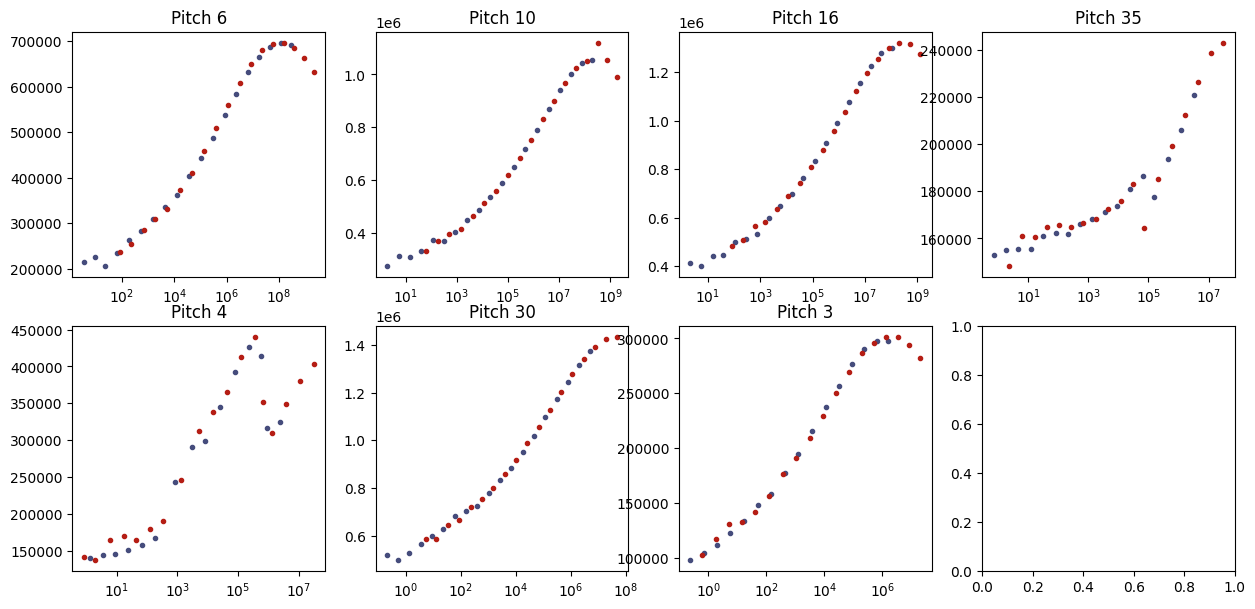

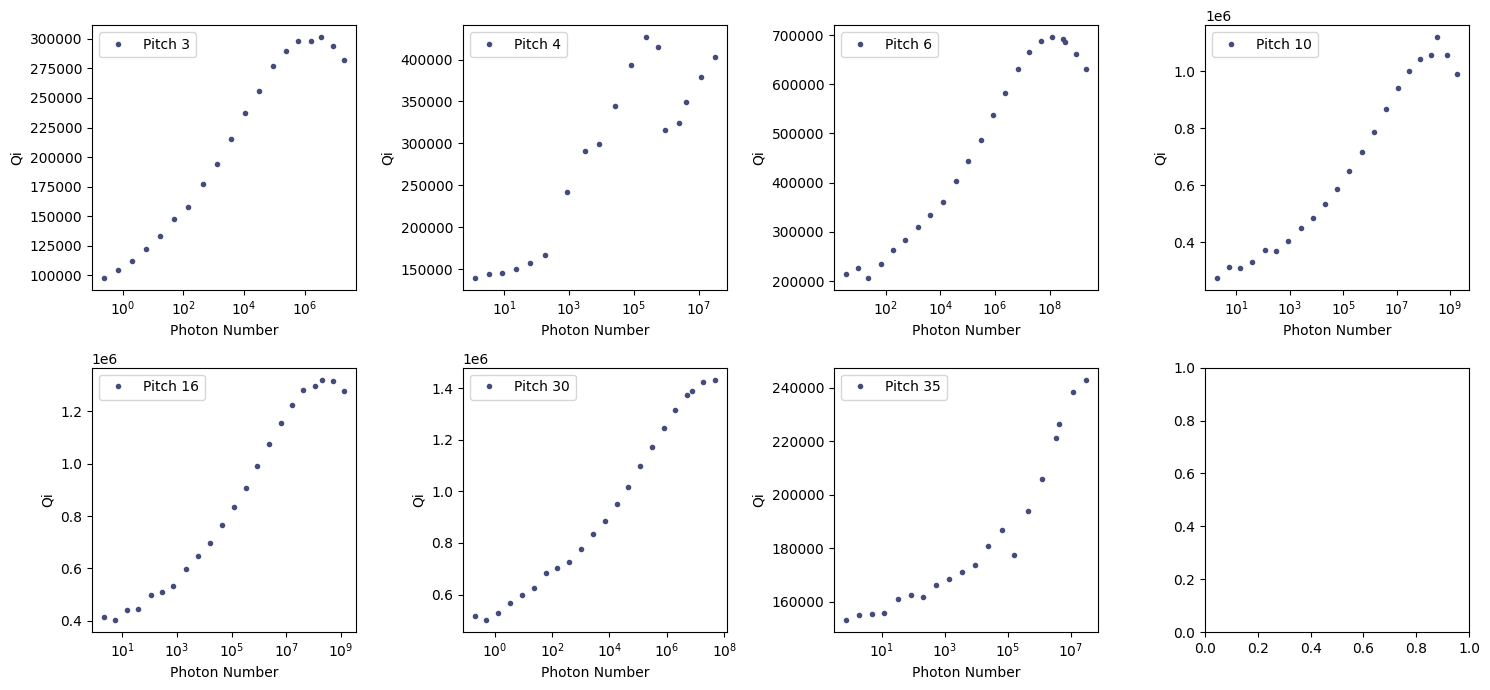

In [267]:
fig, ax = plt.subplots(2,4, figsize=(15, 7))
ax = ax.flatten()
df_full = pd.DataFrame()
csv_files_in_dir = [f for f in os.listdir(data_pth[0]) if f.startswith('fit_results') and f.endswith('.csv')]
csv_files_in_dir.sort()
print(csv_files_in_dir)
# jpa 
coef = np.array([15, 16, 18, 27, 26, 29, 25.75])+1

# slab
#coef = np.array([4,7.75,10,15,16,18.2])

#coef = np.array([0, 0, 0, 0, 0, 0, 0])  # No correction for slab resonators
for i, csv_file in enumerate(csv_files_in_dir):
    df= pd.DataFrame()
    photon_max = []
    for j, d in enumerate(data_pth): 
        file_path = os.path.join(d, csv_file)
        df_tmp = pd.read_csv(file_path)
        df_tmp['ind']=j
        
        if j>0:
            df_tmp['photon_number'] = df_tmp['photon_number']*10**(-coef[i]/20)
        df=pd.concat([df, df_tmp], ignore_index=True)
        try: 
            ax[i].semilogx(df_tmp['photon_number'], df_tmp['q_internal'],'.')
            ax[i].set_title(f'Pitch {params["pitch"][i]}')
        
        except: 
            pass
        #photon_range.append([df_tmp['photon_number'].max(), df_tmp['photon_number'].min()])
        photon_max.append(df_tmp['photon_number'].max())
    #print(photon_max)
    power_order = np.argsort(photon_max)
    df = df[(df['ind'] == power_order[0]) | (df['photon_number'] >= photon_max[power_order[0]])]
    # filtered_df = df[df['ind']] == sorted_inds[1]
    # filtered_df = filtered_df[filtered_df['photon_number'] < np.min(photon_range)]
    # print(filtered_df)
    

    df['pitch']=params['pitch'][i]
    df['target_freq']=params['target_freq'][i]
    df['resonator_id'] = i
    df['temp']=0.04
    df_full = pd.concat([df_full, df], ignore_index=True)

df_full = df_full.sort_values(by='pitch')


fig, ax = plt.subplots(2,4, figsize=(15, 7))
ax = ax.flatten()
grouped = df_full.groupby('pitch')
for i, (pitch, group) in enumerate(grouped):
    ax[i].semilogx(group['photon_number'], group['q_internal'], '.', label=f'Pitch {pitch}')
    #ax[i].set_title(f'Pitch {pitch}')
    ax[i].set_xlabel('Photon Number')
    ax[i].set_ylabel('Qi')
    ax[i].legend()
fig.tight_layout()
coef = [0, 25]


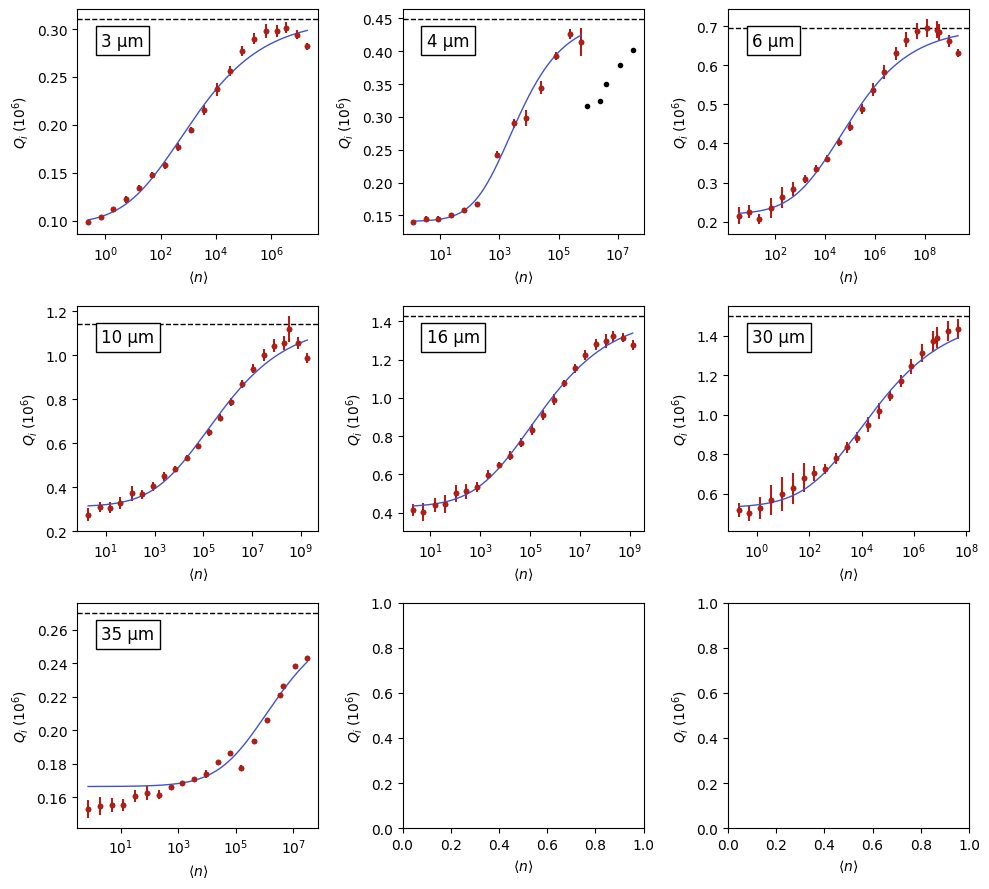

In [ ]:
# for slab 
max_photon = [1e8, 1.2e9, 8e8, 1.5e9, 2e9, 2e7]
min_photon = [1, 1, 1, 1, 1, 1]
exclude = [None] * len(max_photon)  # Exclude all data points
exclude[4]=[11]
q_other_bounds = [np.inf, np.inf, np.inf, np.inf, 1.47e6, 0.93e6]  # Example bounds for Qoth
# for jpa 
max_photon = [3e7, 0.9e6, 5e9, 5e9, 5e9, 2e10, 2e10]
min_photon = [0.2, 1, 1, 1, 1, 0.2,0.2]
q_other_bounds = [np.inf, np.inf, np.inf, np.inf, np.inf, 1.5e6, 0.265e6]  # Example bounds for Qoth

# max_photon = [2e7, 5e5, 1e10, 5e9, 5e9, 2e10, 2e10]
# min_photon = [0, 0, 0, 0, 0, 0, 0]

#min_photon = [300, 1, 1, 1, 240000, 1000]
#params, 
#cfg = ana_tls.fit_qi2(df_full, img_pth, name=img_name)
#cfg = ana_tls.fit_qi2(df_full, img_pth, name=img_name, max_photon_vec=max_photon, min_photon_vec=min_photon, exclude=exclude, q_other_bounds=q_other_bounds, show_all=False, wide=False) 
cfg = ana_tls.fit_qi2(df_full, img_pth, name=img_name, max_photon_vec=max_photon, min_photon_vec=min_photon, show_all=True, wide=False, q_other_bounds=q_other_bounds) 

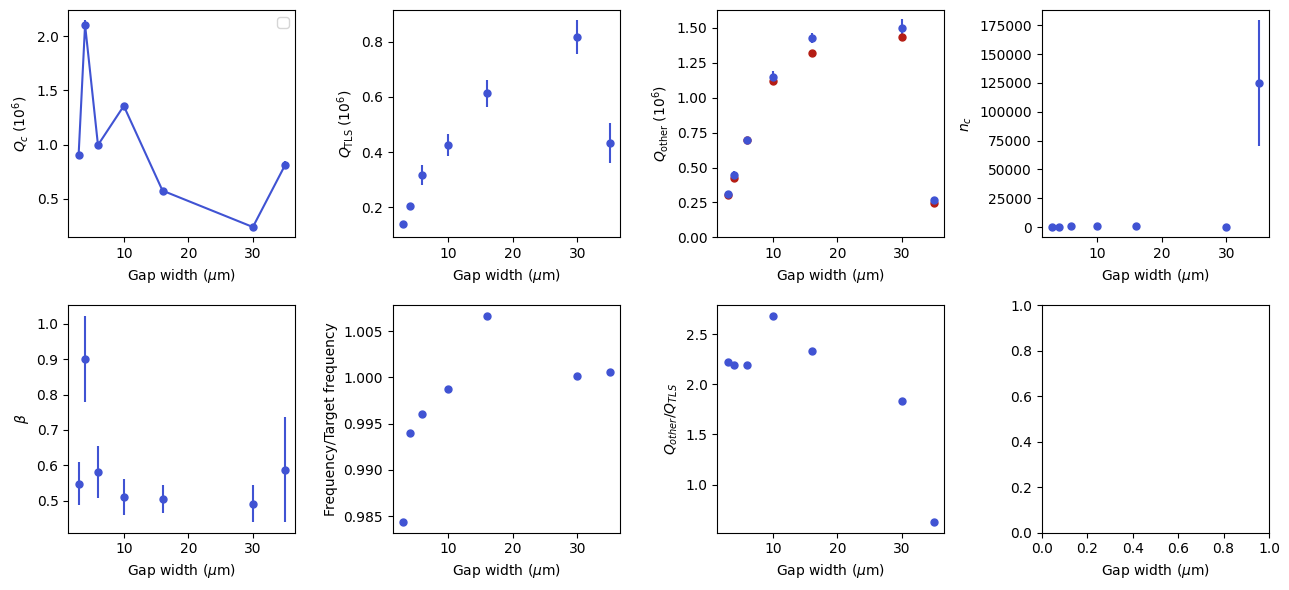

In [283]:
ana_tls.plot_res_pars([cfg], [''],img_pth, name=img_name)
hy.save_np(cfg, img_pth+'Text/' +params['pth'][ind][0:-1] +params['meas'][ind] + '.yml')

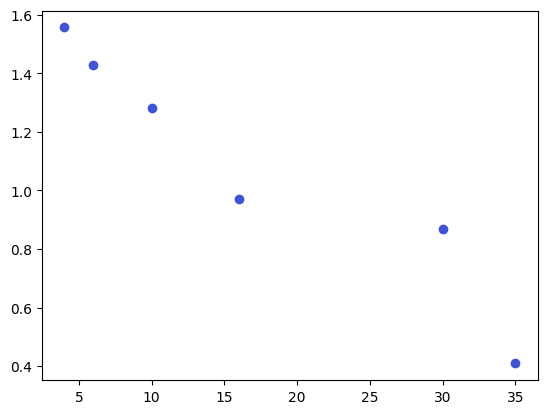

In [260]:
plt.figure()
plt.plot(cfg['pitch'], cfg['qother']/cfg['qtls0'],'o')

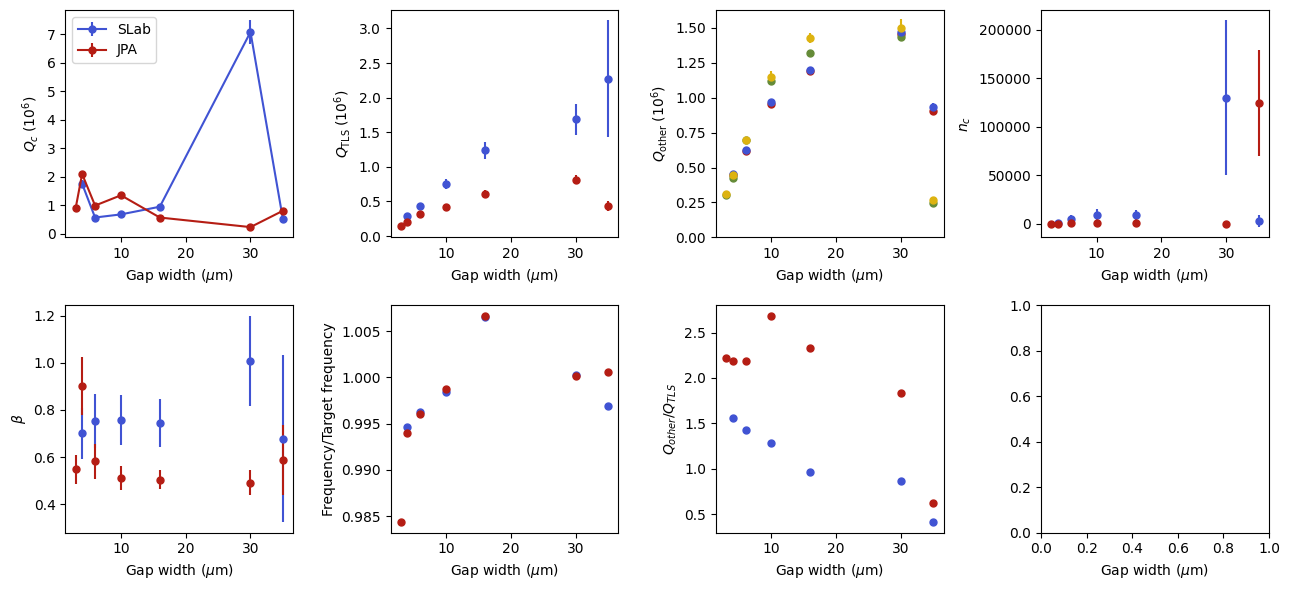

In [284]:
pnames = ['20250728-ResSilTa-Aggron-Slabsilta8_slab' ,'20250728-ResSilTa-Aggron-JPAsilta8_jpa']
labs = ['SLab', 'JPA'] 
plist =[]
for p in pnames:
    plist.append(hy.load(img_pth +'Text/'+ p + '.yml'))

ax=ana_tls.plot_res_pars(plist, labs,img_pth, name=pnames[0]+'_' +pnames[1])
#ResonatorPlotter.plot_res_pars(plist, labs,img_pth)

In [285]:
print(plist[0]['qc']/1e6)
print(plist[1]['qc'][1:]/1e6)
plist[0]['pitch']

[1.76244468 0.57790815 0.68743754 0.95620433 7.0811956  0.52923577]
[2.10476957 0.99669395 1.35723871 0.57693403 0.24159415 0.81369445]


array([ 4,  6, 10, 16, 30, 35])

In [286]:
qcs = np.array([plist[0]['qc'],plist[1]['qc'][1:]])
qcs_std = np.std(qcs, axis=0)
qcs_mean = np.mean(qcs, axis=0)
print(qcs_std/qcs_mean)

qcs[0]/qcs[1]

[0.08851976 0.26596293 0.32758299 0.24738165 0.93401582 0.2118194 ]


array([ 0.83735755,  0.57982509,  0.50649716,  1.65738936, 29.3102937 ,
        0.65041094])

In [288]:
qcs_mean/1e6


array([1.93360713, 0.78730105, 1.02233812, 0.76656918, 3.66139488,
       0.67146511])

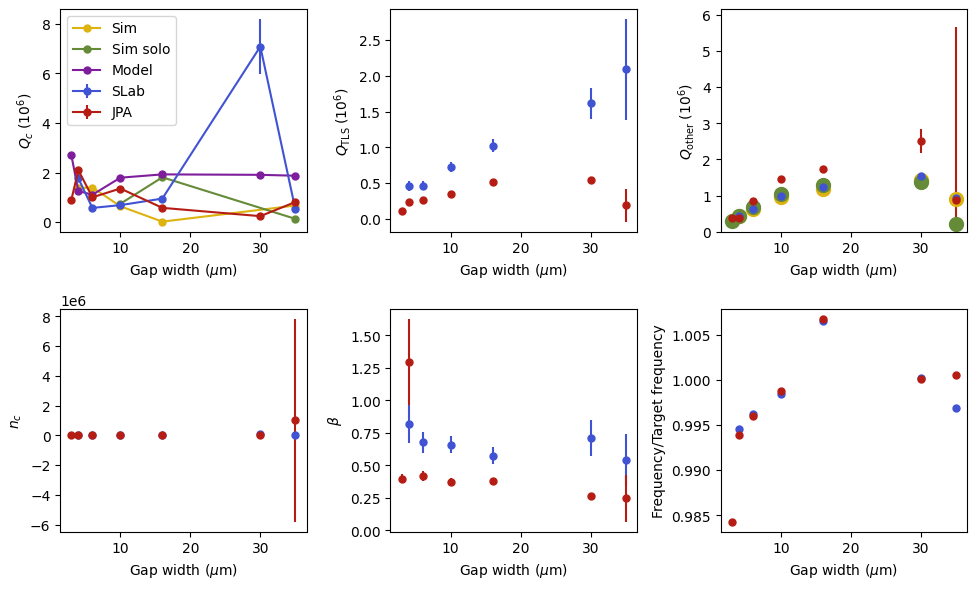

In [ ]:
pnames = ['20250728-ResSilTa-Aggron-Slabsilta8_slab' ,'20250728-ResSilTa-Aggron-JPAsilta8_jpa']
labs = ['SLab', 'JPA'] 
plist =[]
for p in pnames:
    plist.append(hy.load(img_pth +'Text/'+ p + '.yml'))

ax=ana_tls.plot_res_pars(plist, labs,img_pth, name=pnames[0]+'_' +pnames[1])

pitch = [35, 16, 10, 6, 4]
qc = [0.67, 0.02, 0.64, 1.398, 1.378]
ax[0].plot(pitch, qc, '.-', label='Sim')  
pitch2 = np.array([35, 16, 10])
qc2 = [0.133, 1.81, 0.7415]
ax[0].plot(pitch2, qc2, '.-', label='Sim solo')  
ax[0]
pitch = [35, 30, 16, 10, 6, 4, 3]
qcmod=np.array([1.87391594, 1.9094882 , 1.92735652, 1.79437465, 1.10543605,
       1.25610119, 2.69461627])

ax[0].plot(pitch, qcmod, '.-', label='Model')
ax[0].legend()  

ax[2].plot(plist[0]['pitch'], plist[0]['qi_hi']/1e6, 'o', label='JPA')
ax[2].plot(plist[1]['pitch'], plist[1]['qi_hi']/1e6, 'o', label='SLab')

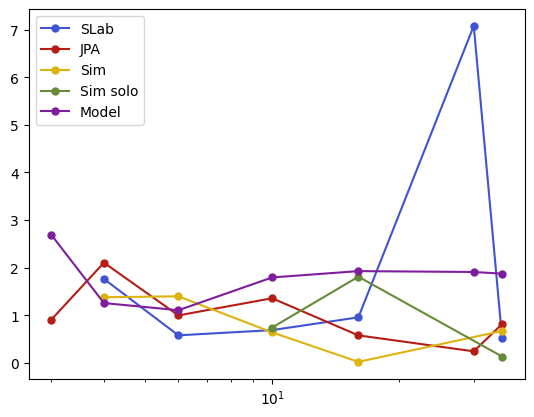

In [292]:
plt.figure()
plt.semilogx(plist[0]['pitch'], plist[0]['qc']/1e6, '.-', label='SLab')

plt.plot(plist[1]['pitch'], plist[1]['qc']/1e6, '.-', label='JPA')

qc_meas = (plist[0]['qc']+plist[1]['qc'][1:])/2

# plt.semilogx(plist[0]['pitch'], qc_meas/1e6, '.-', label='Average Meas')

pitch = [35, 16, 10, 6, 4]
qc = [0.67, 0.02, 0.64, 1.398, 1.378]
plt.plot(pitch, qc, '.-', label='Sim') 

pitch2 = np.array([35, 16, 10])
qc2 = [0.133, 1.81, 0.7415]
plt.plot(pitch2, qc2, '.-', label='Sim solo')  

pitch = [35, 30, 16, 10, 6, 4, 3]
qcmod=np.array([1.87391594, 1.9094882 , 1.92735652, 1.79437465, 1.10543605,
       1.25610119, 2.69461627])

plt.plot(pitch, qcmod, '.-', label='Model')
plt.legend()  

In [294]:
qc_meas/1e6

array([1.93360713, 0.78730105, 1.02233812, 0.76656918, 3.66139488,
       0.67146511])

In [ ]:
print(plist[0]['qc']/1e6/qcmodflip[:-1])
print(plist[1]['qc']/1e6/qcmodflip)

print(np.mean(plist[0]['qc']/1e6/qcmodflip[:-1]))
np.mean(plist[1]['qc']/1e6/qcmodflip)

# just 10 and 16 are weird 


[0.64965207 0.45928547 0.62583691 0.53016749 3.62533384 0.27667894]
[0.33439615 1.68366972 0.90512814 0.7549229  0.29978911 0.12665082
 0.43366802]
1.0278257875105548


0.6483178387378353

In [184]:
print(np.mean(np.array([0.64965207, 0.45928547, 0.62583691, 0.53016749, 0.27667894])))
print(np.mean(np.array([0.33439615, 1.68366972, 0.90512814, 0.7549229,  0.29978911, 0.43366802])))

0.508324176
0.7352623399999999


In [ ]:
print(np.std(np.array([0.64965207, 0.45928547, 0.62583691, 0.53016749, 0.27667894])))
print(np.std(np.array([0.33439615, 1.68366972, 0.90512814, 0.7549229,  0.29978911, 0.43366802])))

0.134405548017024
0.4778436383475996


In [186]:
print(np.mean(np.array([0.45928547, 0.62583691, 0.53016749, 0.27667894])))
print(np.mean(np.array([1.68366972, 0.90512814, 0.7549229,  0.29978911, 0.43366802])))

print(np.std(np.array([0.45928547, 0.62583691, 0.53016749, 0.27667894])))
print(np.std(np.array([1.68366972, 0.90512814, 0.7549229,  0.29978911, 0.43366802])))

0.4729922025
0.815435578
0.1278253590457393
0.4852164081136354
